### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

### Import Data

In [5]:
files = list()
for file in os.listdir('Annual Sales/'):
    if file.endswith('.csv'):
        files.append(pd.read_csv(f'Annual Sales/{file}'))
        
sales = pd.concat(files)

### Inspect Data

In [6]:
sales.shape

(186850, 6)

In [4]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Question 1 - Find state with most orders

### Remove Empty & Redundant Records

In [5]:
sales.dropna(how = 'all', inplace = True)

In [6]:
sales.shape

(186305, 6)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 5.7+ MB


In [8]:
sales.sort_values(by='Order ID')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
17012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2728,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17085,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
sales = sales[sales['Order ID'] != 'Order ID']
sales.shape

(185950, 6)

In [11]:
sales['State'] = sales['Purchase Address'].apply(lambda address: address.split(', ')[2][:2])

In [12]:
sales['State'].unique()

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

In [13]:
sales['State'].value_counts()

CA    74337
NY    24876
TX    24725
MA    19934
GA    14881
WA    14732
OR    10010
ME     2455
Name: State, dtype: int64

## Question 2 - Find city with most orders

In [14]:
sales['City'] = sales['Purchase Address'].str.split(', ',expand = True)[1]

In [15]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,State,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",TX,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",MA,Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",CA,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",CA,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",CA,Los Angeles


In [16]:
sales.groupby(['State', 'City']).size().sort_values(ascending = False).to_frame()

0
State City                
CA    San Francisco  44732
      Los Angeles    29605
NY    New York City  24876
MA    Boston         19934
GA    Atlanta        14881
TX    Dallas         14820
WA    Seattle        14732
OR    Portland       10010
TX    Austin          9905
ME    Portland        2455

## Question 3 - Find month with highest revenue 
### Creating Columns & Type Conversions

In [22]:
sales['Order ID'] = sales['Order ID'].astype('int')
sales['Price Each'] = sales['Price Each'].astype('float')
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int')
sales['Order Revenue'] = sales['Price Each'] * sales['Quantity Ordered']

In [23]:
sales['Order Date'] = sales['Order Date'].astype('datetime64')
#sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 9 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
State               185950 non-null object
City                185950 non-null object
Order Revenue       185950 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 9.9+ MB


In [25]:
sales['Month'] = sales['Order Date'].dt.month_name()

In [26]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [27]:
sales.groupby('Month').sum()['Order Revenue'].sort_values(ascending = False)

Month
December    4,613,443.34
October     3,736,726.88
April       3,390,670.24
November    3,199,603.20
May         3,152,606.75
March       2,807,100.38
July        2,647,775.76
June        2,577,802.26
August      2,244,467.88
February    2,202,022.42
September   2,097,560.13
January     1,822,256.73
Name: Order Revenue, dtype: float64

## Question 4 - What Will Be The Best Hours To Display Ads to Potential Customers

In [28]:
sales['Hour'] = sales['Order Date'].dt.hour
sales.groupby('Hour').size()

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
dtype: int64

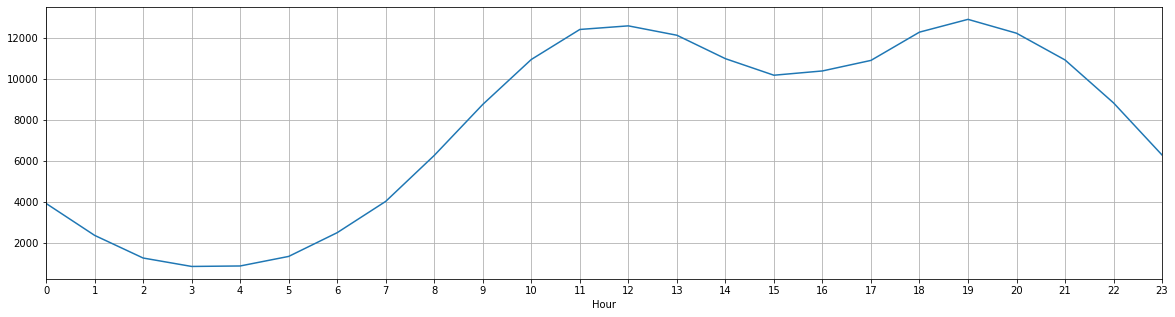

In [29]:
sales.groupby('Hour').size().plot.line(grid=True, figsize = (20,5), xticks = range(24))

## Question 4 - Find The Product Sold The Most

In [38]:
sales.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending = False)

Product
AAA Batteries (4-pack)       31,017.00
AA Batteries (4-pack)        27,635.00
USB-C Charging Cable         23,975.00
Lightning Charging Cable     23,217.00
Wired Headphones             20,557.00
Apple Airpods Headphones     15,661.00
Bose SoundSport Headphones   13,457.00
27in FHD Monitor              7,550.00
iPhone                        6,849.00
27in 4K Gaming Monitor        6,244.00
34in Ultrawide Monitor        6,199.00
Google Phone                  5,532.00
Flatscreen TV                 4,819.00
Macbook Pro Laptop            4,728.00
ThinkPad Laptop               4,130.00
20in Monitor                  4,129.00
Vareebadd Phone               2,068.00
LG Washing Machine              666.00
LG Dryer                        646.00
Name: Quantity Ordered, dtype: float64

### Do products sell more because they are cheap? How can we check that?

In [67]:
sales.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00


In [66]:
sales.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).corr()

,Quantity Ordered,Price Each
Quantity Ordered,1.00,-0.60
Price Each,-0.60,1.00


### Question 5 - Find The Products That Are Most Commonly Sold Together

In [39]:
len(sales)

185950

In [40]:
sales['Order ID'].nunique()

178437

In [83]:
multi_item_sales = sales[sales['Order ID'].duplicated(keep=False)][['Order ID', 'Product']]
multi_item_sales

,Order ID,Product
3,176560,Google Phone
4,176560,Wired Headphones
18,176574,Google Phone
19,176574,USB-C Charging Cable
30,176585,Bose SoundSport Headphones
...,...,...
11628,259303,AA Batteries (4-pack)
11639,259314,Wired Headphones
11640,259314,AAA Batteries (4-pack)
11677,259350,Google Phone


In [84]:
multi_item_sales.groupby('Order ID')['Product'].transform(lambda prod: ','.join(prod))

3                            Google Phone,Wired Headphones
4                            Google Phone,Wired Headphones
18                       Google Phone,USB-C Charging Cable
19                       Google Phone,USB-C Charging Cable
30       Bose SoundSport Headphones,Bose SoundSport Hea...
                               ...                        
11628         34in Ultrawide Monitor,AA Batteries (4-pack)
11639              Wired Headphones,AAA Batteries (4-pack)
11640              Wired Headphones,AAA Batteries (4-pack)
11677                    Google Phone,USB-C Charging Cable
11678                    Google Phone,USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [86]:
multi_item_sales['Product'] = multi_item_sales.groupby('Order ID')['Product'].transform(lambda prod: ','.join(prod))
multi_item_sales

,Order ID,Product
3,176560,"Google Phone,Wired Headphones"
4,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
19,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...
11628,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,"Google Phone,USB-C Charging Cable"


In [90]:
multi_item_sales.drop_duplicates(inplace=True)

In [96]:
from itertools import combinations

In [117]:
prod_combinations = dict()
for row in multi_item_sales['Product']:
    for comb in combinations(row.split(','),2):
        prod_combinations.setdefault(comb, 0)
        prod_combinations[comb] += 1

In [124]:
sorted(prod_combinations.items(), key = lambda x: x[1], reverse = True)[:10]

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]